<a href="https://colab.research.google.com/github/tomonari-masada/course2022-intro2ml/blob/main/09_linear_regression_(in_class).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線形回帰
* 線形モデルを使って、数値を予測する問題を解く。

* scikit-learnの線形回帰を利用
 * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

## toy dataで線形回帰の使い方を把握

* 一変数の場合の線形回帰
$$f(x) = ax + b$$

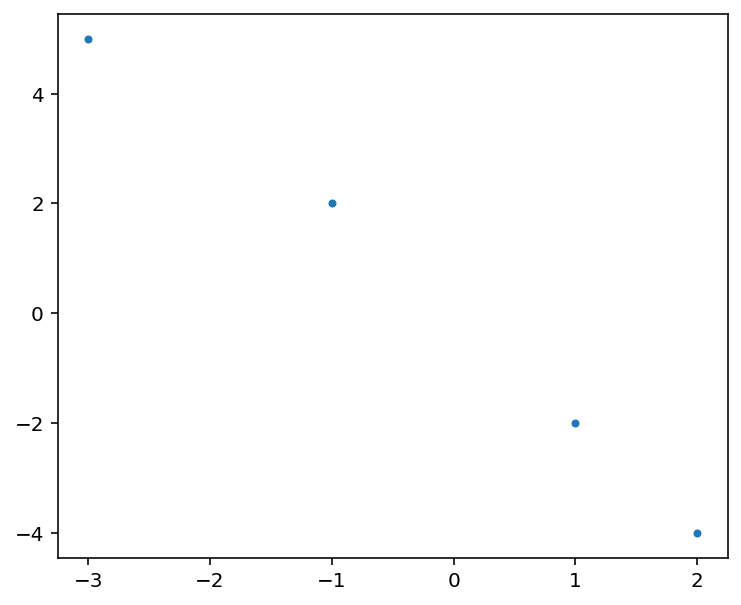

In [ ]:
fig = plt.figure(figsize=(6,5))
x = [2, 1, -3, -1]
y = [-4, -2, 5, 2]
plt.plot(x, y, '.');

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x, y) 

ValueError: ignored

In [ ]:
x

[2, 1, -3, -1]

In [ ]:
x = np.array(x)
print(x)

[ 2  1 -3 -1]


In [ ]:
X = x.reshape(-1,1)
print(X)

[[ 2]
 [ 1]
 [-3]
 [-1]]


In [ ]:
reg.fit(X, y) # 機械に学習させている行

LinearRegression()

In [ ]:
X = [[2], [1], [-3], [-1]]

In [ ]:
reg.fit(X, y)

LinearRegression()

In [ ]:
reg.intercept_ # f(x) = ax + bのb

-0.20338983050847464

In [ ]:
print(reg.coef_) # f(x) = ax + bのa

[-1.81355932]


答えは $f(x) = -1.8136x-0.2034$

In [ ]:
reg.predict([[0.5], [1.2], [12.3], [-321.23]])

array([ -1.11016949,  -2.37966102, -22.51016949, 582.36627119])

In [ ]:
0.5 * reg.coef_[0] + reg.intercept_

-1.1101694915254239

* グラフの描き方

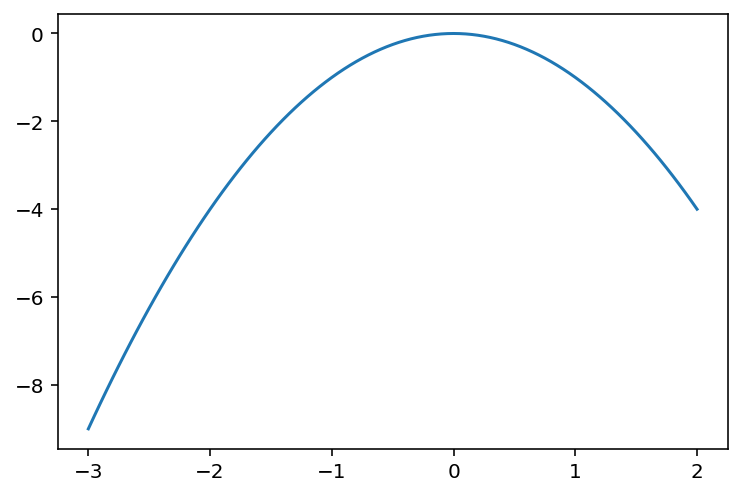

In [ ]:
xx = np.linspace(-3, 2, 101) # 細かく点をとる
yy = - xx ** 2 # 対応する縦軸方向の値
plt.plot(xx, yy);

In [ ]:
xx = np.linspace(-3, 2, 101).reshape(-1, 1)
print(xx)

* x軸上に細かく点を打って各点での予測値をプロット
 * 観測データに近い位置に直線が引かれることを確認する。

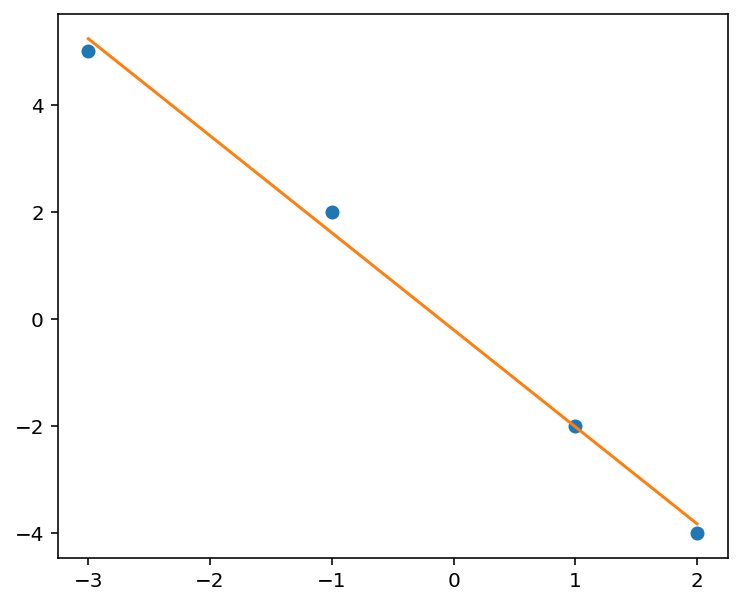

In [ ]:
fig = plt.figure(figsize=(6,5))
xs = np.linspace(-3,2,101)
ys = reg.predict(xs.reshape(-1,1))
plt.plot(x, y, 'o') # 訓練(training)データ
plt.plot(xs, ys);

In [ ]:
print(xs)

[-3.   -2.95 -2.9  -2.85 -2.8  -2.75 -2.7  -2.65 -2.6  -2.55 -2.5  -2.45
 -2.4  -2.35 -2.3  -2.25 -2.2  -2.15 -2.1  -2.05 -2.   -1.95 -1.9  -1.85
 -1.8  -1.75 -1.7  -1.65 -1.6  -1.55 -1.5  -1.45 -1.4  -1.35 -1.3  -1.25
 -1.2  -1.15 -1.1  -1.05 -1.   -0.95 -0.9  -0.85 -0.8  -0.75 -0.7  -0.65
 -0.6  -0.55 -0.5  -0.45 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05
  0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15
  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75
  1.8   1.85  1.9   1.95  2.  ]


In [ ]:
print(ys)

[ 5.23728814  5.14661017  5.0559322   4.96525424  4.87457627  4.78389831
  4.69322034  4.60254237  4.51186441  4.42118644  4.33050847  4.23983051
  4.14915254  4.05847458  3.96779661  3.87711864  3.78644068  3.69576271
  3.60508475  3.51440678  3.42372881  3.33305085  3.24237288  3.15169492
  3.06101695  2.97033898  2.87966102  2.78898305  2.69830508  2.60762712
  2.51694915  2.42627119  2.33559322  2.24491525  2.15423729  2.06355932
  1.97288136  1.88220339  1.79152542  1.70084746  1.61016949  1.51949153
  1.42881356  1.33813559  1.24745763  1.15677966  1.06610169  0.97542373
  0.88474576  0.7940678   0.70338983  0.61271186  0.5220339   0.43135593
  0.34067797  0.25        0.15932203  0.06864407 -0.0220339  -0.11271186
 -0.20338983 -0.2940678  -0.38474576 -0.47542373 -0.56610169 -0.65677966
 -0.74745763 -0.83813559 -0.92881356 -1.01949153 -1.11016949 -1.20084746
 -1.29152542 -1.38220339 -1.47288136 -1.56355932 -1.65423729 -1.74491525
 -1.83559322 -1.92627119 -2.01694915 -2.10762712 -2

* 入力が(2,2)のときは、-4が出力されてほしい
* 入力が(1,1)のときは、-2が出力されてほしい
* ・・・

In [7]:
X = [[2, 3], [0.8, 1], [-3.1, -2.3], [-1.4, -1]]
y = [-4, -2, 5, 2]

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y) # 係数と切片の推定estimationの実行

LinearRegression()

$f(x_1, x_2) = a_1 x_1 + a_2 x_2 + b$

In [9]:
print(reg.coef_)

[-1.89639538  0.12128769]


In [10]:
print(reg.intercept_)

-0.5771933801858993


## 例題: 住宅価格の予測
### California housing prices
* よく例題として使われるデータセット
 * https://www.kaggle.com/camnugent/california-housing-prices

### データセットの取得

In [12]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [19]:
data.target[0]

4.526

In [20]:
data.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [21]:
X = data.data
y = data.target

In [22]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [25]:
X[1]

array([ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,  9.71880492e-01,
        2.40100000e+03,  2.10984183e+00,  3.78600000e+01, -1.22220000e+02])

In [26]:
y[1]

3.585

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y) # 最小二乗法で係数と切片を推定する

LinearRegression()

$f(x_1, \ldots, x_8) = a_1 x_1 + \cdots + a_8 x_8 + b$

In [28]:
reg.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

In [29]:
reg.intercept_

-36.94192020718441

In [31]:
y_predict = reg.predict(X)

In [34]:
y_predict[1] # 線形回帰による予測値

3.9766064387043443

In [33]:
y[1] # 正解

3.585

In [39]:
import numpy as np
print(np.sqrt(np.mean((y - y_predict) ** 2))) # RMSE

0.7241001216576387


* 機械学習
 * 未知データに対して良い予測をしたい。
* テストデータを別途用意する。

### 訓練データ/検証データ/テストデータに分割

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
X_train.shape

(16512, 8)

* fitで使ったデータを、predictでは使わない。

In [42]:
X_test.shape

(4128, 8)

* さらにtraining setとvalidation setに分割する

In [43]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [44]:
X_train.shape

(12384, 8)

In [45]:
X_valid.shape

(4128, 8)

* 訓練データ training data, training setをfitに使う。

### 通常の最小二乗法
* 最小二乗法は・・・
 * モデルの出力$\hat{y}_i$と、観測されている目的変数の値$y_i$との差$\hat{y}_i - y_i$をとり・・・
 * それを二乗$(\hat{y}_i - y_i)^2$し・・・
 * 全てのデータ点にわたってその2乗の和$\sum_{i=1}^N (\hat{y}_i - y_i)^2$をとり・・・
 * この和を最小化することで、線形モデルの係数や切片を求める方法。

In [46]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [48]:
y_valid_predict = reg.predict(X_valid)

In [49]:
print(y_valid_predict)

[2.27946503 1.73635702 1.85866451 ... 2.36018755 3.60240794 1.3122053 ]


In [50]:
print(y_valid)

[2.418 1.875 1.714 ... 2.813 3.74  1.014]


* R-squared（決定係数）によって評価する
 * 1.0に近いほど良い。

In [51]:
print(f'R^2: {reg.score(X_valid, y_valid)}')

R^2: 0.5839478528504749


* 機械学習の世界では、R^2ではなく、直接、予測値の良し悪しを評価する場合がほとんど
 * 回帰の場合は真の値と予測値との差の二乗の平均のルート(RMSE; root-mean-square error)を評価によく使う。

In [52]:
print(f'RMSE: {np.sqrt(np.mean((y_valid - y_valid_predict) ** 2))}')

RMSE: 0.7493303380434644


* RMSEは、自分でコードを書かなくても、sklearnに関数が用意されている

In [53]:
from sklearn.metrics import mean_squared_error
print(f'RMSE: {mean_squared_error(y_valid, y_valid_predict, squared=False)}')

RMSE: 0.7493303380434644


# 線形モデルにおける正則化
* 正則化とは、わざとモデルをシンプルなものにすることで・・・
* モデルの係数や切片が、訓練データだけにピッタリ合いすぎることを防ぐ手法を言う。
 * 訓練データだけにピッタリ合ってしまうと、訓練データ以外のデータで予測がうまくいかなくなる。

### リッジ回帰
* 最小二乗法だが、同時に、係数の２乗の和が大きくならないようにするモデル
 * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

### Lasso
* 最小二乗法だが、同時に、係数の絶対値の和が大きくならないようにするモデル
 * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

## テストデータを使った最終的な評価
* 通常の最小二乗法、リッジ回帰、Lassoなどで試行錯誤し・・・
* 検証データでの評価値が最も良かったモデルについて、最後に一回、テストデータで評価する。
* テストデータの評価値を見て、試行錯誤に戻ってはいけないです。
 * 論文などで報告するのは、テストデータでの評価値。